#### 데이터 불러오기

종속 변수(y) : 생존 여부 (0 사망, 1 생존)  
독립 변수(x) : pclass, sex, age 등의 탑승자 정보 (변수)

In [2]:
import seaborn as sns
# 데이터셋 목록 : sns.get_dataset_names()
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 1) 결측치 확인 및 처리

In [6]:
# 결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
# 결측치 제거
print(df.dropna(axis=0).head(5)) # 행 기준

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1          1       1  female  38.0      1      0  71.2833        C  First   
3          1       1  female  35.0      1      0  53.1000        S  First   
6          0       1    male  54.0      0      0  51.8625        S  First   
10         1       3  female   4.0      1      1  16.7000        S  Third   
11         1       1  female  58.0      0      0  26.5500        S  First   

      who  adult_male deck  embark_town alive  alone  
1   woman       False    C    Cherbourg   yes  False  
3   woman       False    C  Southampton   yes  False  
6     man        True    E  Southampton    no   True  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  


In [27]:
print(df.dropna(axis=1).head(5)) # 열 기준

   survived  pclass     sex  sibsp  parch     fare  class    who  adult_male  \
0         0       3    male      1      0   7.2500  Third    man        True   
1         1       1  female      1      0  71.2833  First  woman       False   
2         1       3  female      0      0   7.9250  Third  woman       False   
3         1       1  female      1      0  53.1000  First  woman       False   
4         0       3    male      0      0   8.0500  Third    man        True   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  


In [8]:
# 결측치 대체
# 데이터 복사
df2 = df.copy()

In [9]:
# 1. 중앙값/평균값 등으로 대체
# 먼저 중앙값을 구합니다.
median_age = df2['age'].median()
print(median_age)

# 평균으로 대체 할 경우
# mean_age = df2['age'].mean()

28.0


In [10]:
# 구한 중앙값으로 결측치를 대체합니다.
df2['age'] = df['age'].fillna(median_age)

In [11]:
# 결측치가 잘 대체 되었는지 확인합니다.
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 2) 이상치 확인 및 처리

상자 그림 활용 ( 이상치 : Q1, Q3로부터 1.5*IQR을 초과하는 값 )

<Axes: ylabel='age'>

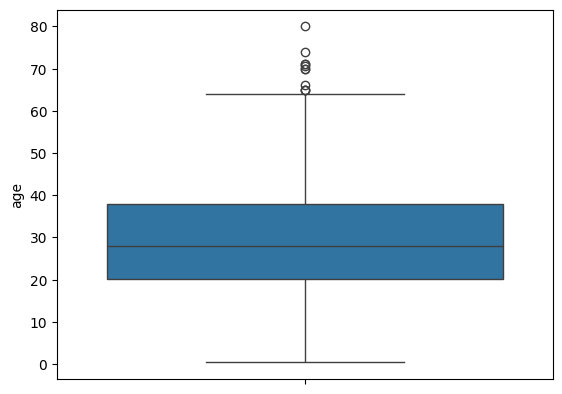

In [12]:
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

# ( 참고 ) 상자그림
sns.boxplot(df['age'])

In [13]:
# Q1, Q3, IQR 구하기
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

20.125 38.0 17.875


In [14]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper, lower)

64.8125 -6.6875


In [15]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? (상자그림 기준)
cond1 = (df['age'] <= upper) # 부호주의
cond2 = (df['age'] >= lower) # 부호주의
print(len(df[cond1 & cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [16]:
# 문제 : age 변수의 이상치를 제외한 데이터셋 확인
df_new = df[cond1 & cond2]
print(df_new.head(3))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  


#### 표준정규분표 활용 ( 이상치: +- 3z 값을 넘어가는 값 )

In [17]:
# 데이터 표준화, Z = ( 개별값 - 평균 ) / 표준편차

In [18]:
mean_age = df['age'].mean() # 평균
std_age = df['age'].std() # 표준 편차
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334042


In [19]:
znorm = (df['age'] - mean_age) / std_age # ( 이상치 )
print(znorm)

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64


In [20]:
# 문제 : 이상치의 갯수는 몇 개인가? ( : +- 3Z 기준 )

In [21]:
cond1 = (znorm > 3)
len(df[cond1])

2

In [22]:
cond2 = (znorm < -3)
len(df[cond2])

0

In [23]:
print(len(df[cond1]) + len(df[cond2]))

2


#### 3) 중복값 제거

In [24]:
# 데이터 불러오기
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [25]:
df1 = df.copy()
df1 = df1.drop_duplicates() # 중복값 제거
print(df1.shape)
# (주의) 예제에서는 중복값이 있어서 제거했지만,
# 중복값이 나올 수 있는 상황이면 제거 할 필요 없음

(784, 15)
